## CPU Data from 6th Nov 2015 to 15th Nov 2015

In [1]:
# Import Libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

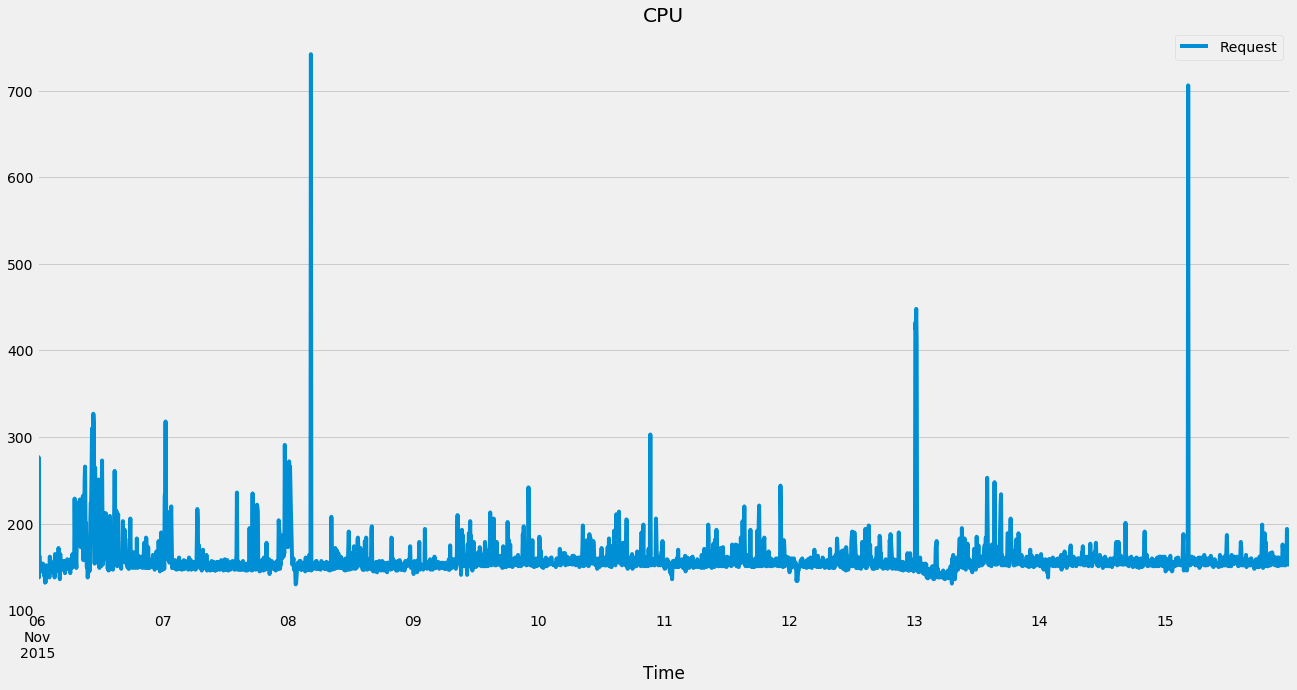

In [2]:
#Plot Data
data_plot = pd.read_csv('DATASETCPU_NEW.csv')
data_plot.columns = ['Time','Request']
data_plot['Time'] = pd.to_datetime(data_plot['Time'], format='%d.%m.%Y %H:%M:%S')
data_plot = data_plot.set_index('Time')
data_plot.plot(figsize=(20, 10))
plt.legend(loc='best')
plt.title('CPU')
plt.show(block=False)

In [3]:
# Import data from and in DataFram
data = pd.read_csv('DATASETCPU_NEW.csv')
data.columns = ['Time','Request']
data['Time'] = pd.to_datetime(data['Time'], format='%d.%m.%Y %H:%M:%S')
Time = data.pop('Time')
data.head()

,Request
0,148
1,156
2,146
3,277
4,138


In [4]:
#ADF to chek the series Stationarity
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data)

print('ADF Statistic: %f' % adf_test[0])
print('No of Lags: %f' % adf_test[2])
print('No of Observations: %f' % adf_test[3])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -11.324980
No of Lags: 11.000000
No of Observations: 2868.000000
Critical Values @ 0.05: -2.86
p-value: 0.000000


with the above p-value we can say, series is Stationarity.

<Figure size 432x288 with 0 Axes>

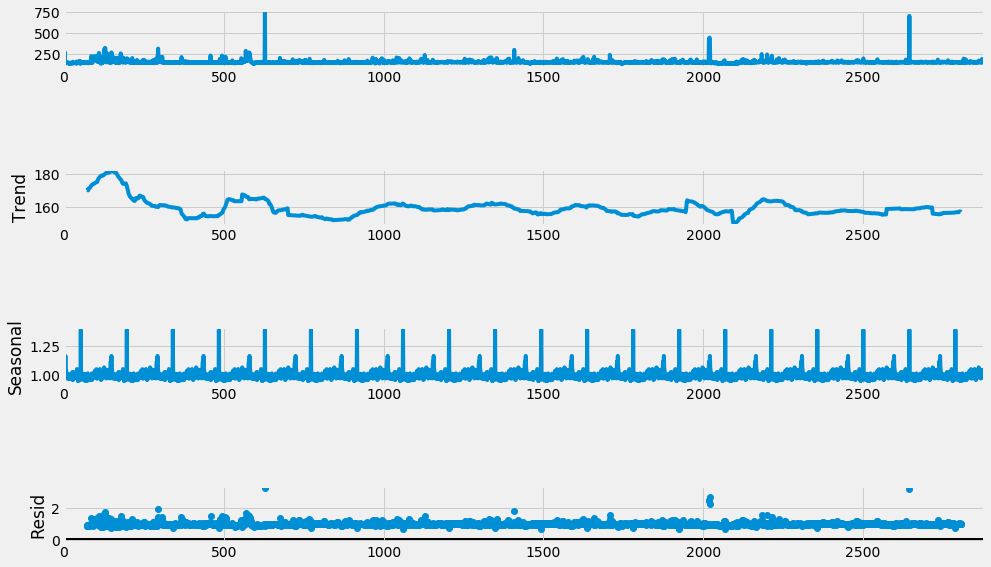

In [5]:
# Decompose the Series
result = seasonal_decompose(data, model='multiplicative', freq = 144)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [6]:
# As Series have Varience so rescale on Log
df_log = np.log(data)

In [7]:
# Train test Split 1st time from 6th Nov 2015 to 10th Nov 2015 as Train and 11th Nov 2015 as Test
train_data1 = df_log[0:1440] 
test_data1 = df_log[1440:1728]
print(train_data1.tail())
print(test_data1.tail())

       Request
1435  5.123964
1436  5.056246
1437  5.192957
1438  5.023881
1439  5.036953
       Request
1723  5.030438
1724  5.036953
1725  5.062595
1726  5.017280
1727  5.081404


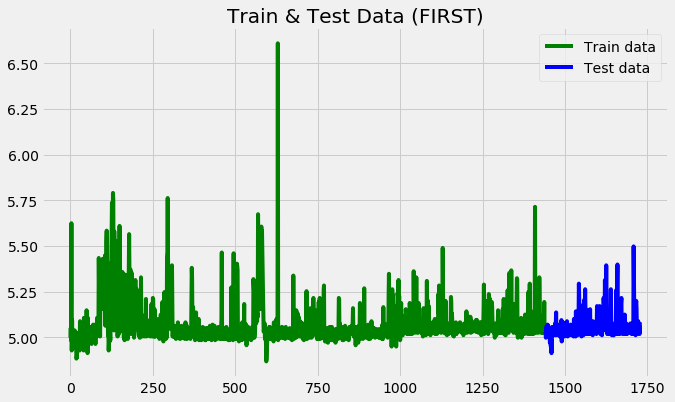

In [8]:
# Plot Train & Test Data for - FIRST
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(train_data1, 'green', label='Train data')
plt.plot(test_data1, 'blue', label='Test data')
plt.title('Train & Test Data (FIRST)')
plt.legend()

In [9]:
# Fiting Holt Winter's multiplicative method with trend and seasonality - FIRST
y_hat_hwm1 = test_data1.copy()
model1 = ExponentialSmoothing(np.asarray(train_data1) ,seasonal_periods=144 ,trend='add', seasonal='mul')#'mul'
model_fit1 = model1.fit(optimized=True)
print(model_fit1.params)
y_hat_hwm1['hw_forecast'] = model_fit1.forecast(288)
res1 = model_fit1.resid
#print(model_fit9.summary())

C:\Users\Shraddhay\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


{'smoothing_level': 0.3002230459911736, 'smoothing_slope': 1.8352711317952794e-12, 'smoothing_seasonal': 5.057072509825091e-10, 'damping_slope': nan, 'initial_level': 4.977543120877708, 'initial_slope': 5.406801086367379e-06, 'initial_seasons': array([1.00857171, 1.02277648, 1.02282592, 1.03700926, 1.01089656,
       1.04499057, 1.03184459, 1.02876014, 1.02160375, 1.01959202,
       1.01215607, 1.01572247, 1.01307365, 1.01832091, 1.01790496,
       1.01396333, 1.00918608, 1.01713861, 1.01250559, 1.00901783,
       1.00808687, 1.01410132, 1.00633728, 1.01377055, 1.00577545,
       1.00875298, 1.01242926, 1.02576709, 1.00379676, 1.01470812,
       1.01178092, 1.00429407, 1.00662751, 1.02290087, 1.0211781 ,
       1.02074836, 1.01600055, 1.01275731, 1.01412783, 1.0137358 ,
       1.00265433, 1.02988389, 1.01498445, 1.00851785, 1.00345237,
       1.00674789, 1.00521648, 1.00960869, 1.01204645, 1.02196646,
       1.00941347, 1.00706095, 1.00375485, 1.05021749, 1.00839918,
       1.01032574,

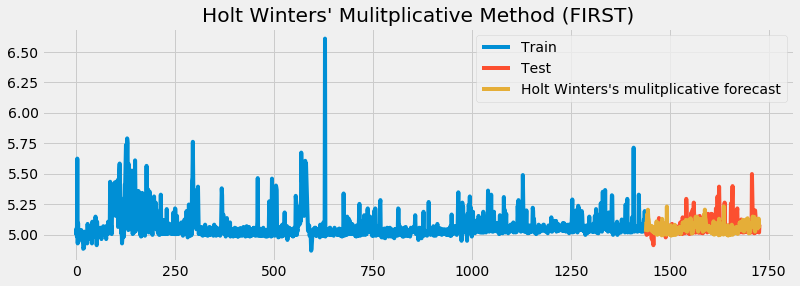

In [10]:
# Plot Holt Winter's multiplicative method with trend and seasonality - FIRST
plt.figure(figsize=(12,4))
plt.plot( train_data1, label='Train')
plt.plot(test_data1, label='Test')
plt.plot(y_hat_hwm1['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method (FIRST)')
plt.show()

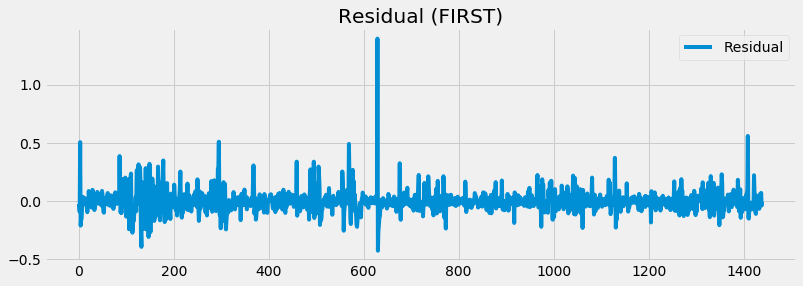

In [11]:
# Plot Residual - FIRST
plt.figure(figsize=(12,4))
plt.plot( res1, label='Residual')
plt.legend(loc='best')
plt.title('Residual (FIRST)')
plt.show()

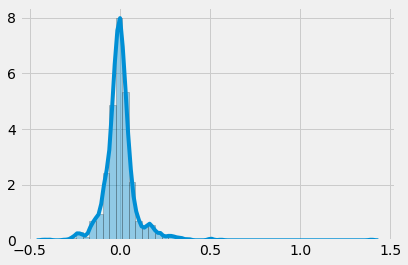

In [12]:
# Plot Residual Density Distribution - FIRST
sns.distplot(res1, hist=True, kde=True,            
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [13]:
# ljungbox test - FIRST
print(sm.stats.acorr_ljungbox(res1, lags=[1], return_df=True))

     lb_stat  lb_pvalue
1  18.503839   0.000017


In [14]:
# Report performance after train, test & Predict - FIRST

mse = mean_squared_error(test_data1, y_hat_hwm1['hw_forecast'])
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data1, y_hat_hwm1['hw_forecast'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data1, y_hat_hwm1['hw_forecast']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs((test_data1['Request']- y_hat_hwm1['hw_forecast'])/test_data1['Request'])*100)
print('MAPE: '+str(mape))
mpe = np.mean((test_data1['Request']- y_hat_hwm1['hw_forecast']/np.abs(test_data1['Request'])*100))
print('MPE: '+str(mpe))
me = np.mean(test_data1['Request']- y_hat_hwm1['hw_forecast'])
print('ME: '+str(me))

MSE: 0.006171879009655399
MAE: 0.053403954952091534
RMSE: 0.07856130733163368
MAPE: 1.0437797601930867
MPE: -94.86619793556373
ME: 0.004535261474877773


In [15]:
# Train test Split 2nd time from 7th Nov 2015 to 11th Nov 2015 as Train and 12th Nov 2015 as Test
train_data2 = df_log[288:1728] 
test_data2 = df_log[1728:2016] 
print(train_data2.tail())
print(test_data2.tail())

       Request
1723  5.030438
1724  5.036953
1725  5.062595
1726  5.017280
1727  5.081404
       Request
2011  5.030438
2012  4.990433
2013  5.056246
2014  4.976734
2015  4.990433


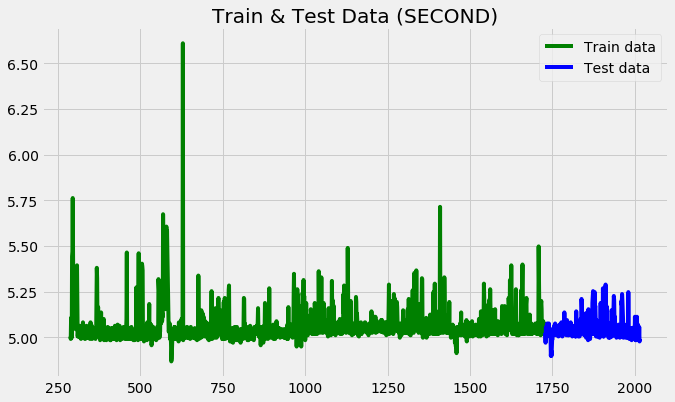

In [16]:
# Plot Train Test Data for - SECOND
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(train_data2, 'green', label='Train data')
plt.plot(test_data2, 'blue', label='Test data')
plt.title('Train & Test Data (SECOND)')
plt.legend()

In [17]:
# Fiting Holt Winter's multiplicative method with trend and seasonality - SECOND
y_hat_hwm2 = test_data2.copy()
model2 = ExponentialSmoothing(np.asarray(train_data2) ,seasonal_periods=144 ,trend='add', seasonal='mul')#'mul'
model_fit2 = model2.fit(optimized=True)
print(model_fit2.params)
y_hat_hwm2['hw_forecast'] = model_fit2.forecast(288)
res2 = model_fit2.resid
#print(model_fit9.summary())

{'smoothing_level': 0.2656098691794229, 'smoothing_slope': 7.511705460020006e-12, 'smoothing_seasonal': 2.3998345429005286e-09, 'damping_slope': nan, 'initial_level': 5.057163797914777, 'initial_slope': 9.876058050986765e-12, 'initial_seasons': array([1.00110543, 1.01426419, 1.00946255, 1.01936667, 1.00370121,
       1.02707437, 1.02216606, 1.02354949, 1.01399235, 1.00930383,
       1.00423526, 1.00288035, 1.00207829, 1.01216836, 1.0043058 ,
       1.00671364, 1.00149046, 1.00912592, 1.00906048, 1.00370153,
       1.00531615, 1.01067096, 1.00185691, 1.00106499, 0.99850434,
       1.00603635, 1.00134644, 1.01992657, 0.99897234, 1.00505708,
       1.00788132, 0.99786629, 0.99919628, 1.01524922, 1.00630189,
       1.0081471 , 1.00567796, 1.01116693, 1.00366826, 1.00695476,
       1.00190322, 1.02363735, 1.00608203, 1.0008912 , 0.99614674,
       0.99933809, 0.99769876, 1.00440325, 1.00574284, 1.01457927,
       0.99883747, 1.00143027, 0.99885057, 1.03739222, 1.00319392,
       1.0084731 ,

C:\Users\Shraddhay\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


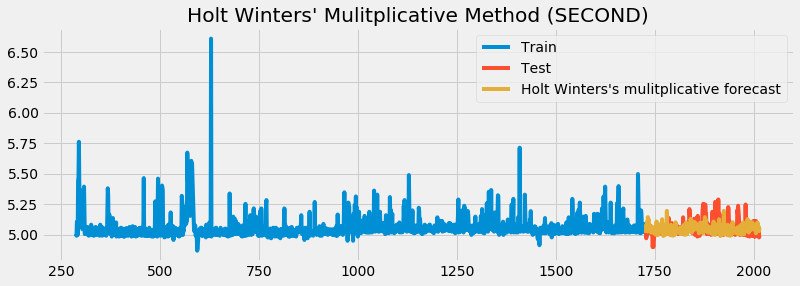

In [18]:
# Plot Holt Winter's multiplicative method with trend and seasonality - SECOND
plt.figure(figsize=(12,4))
plt.plot( train_data2, label='Train')
plt.plot(test_data2, label='Test')
plt.plot(y_hat_hwm2['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method (SECOND)')
plt.show()

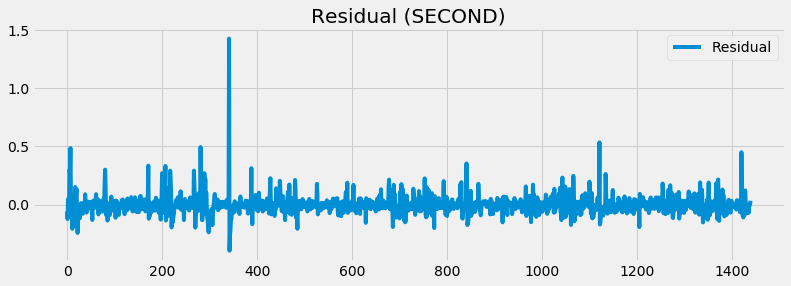

In [19]:
# Plot Residual - SECOND
plt.figure(figsize=(12,4))
plt.plot( res2, label='Residual')
plt.legend(loc='best')
plt.title('Residual (SECOND)')
plt.show()

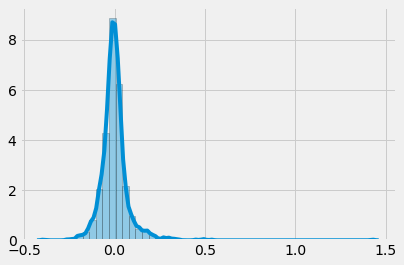

In [20]:
# Plot Residual Density Distribution - SECOND
sns.distplot(res2, hist=True, kde=True,            
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [21]:
# ljungbox test - SECOND
print(sm.stats.acorr_ljungbox(res2, lags=[1], return_df=True))

     lb_stat     lb_pvalue
1  29.088218  6.915628e-08


In [22]:
# Report performance after train, test & Predict - SECOND

mse = mean_squared_error(test_data2, y_hat_hwm2['hw_forecast'])
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data2, y_hat_hwm2['hw_forecast'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data2, y_hat_hwm2['hw_forecast']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs((test_data2['Request']- y_hat_hwm2['hw_forecast'])/test_data2['Request'])*100)
print('MAPE: '+str(mape))
mpe = np.mean((test_data2['Request']- y_hat_hwm2['hw_forecast']/np.abs(test_data2['Request'])*100))
print('MPE: '+str(mpe))
me = np.mean(test_data2['Request']- y_hat_hwm2['hw_forecast'])
print('ME: '+str(me))

MSE: 0.004636706898635632
MAE: 0.048440386872839164
RMSE: 0.06809336897698359
MAPE: 0.9536311297363445
MPE: -94.91913063718309
ME: 0.0023844164740339175


In [23]:
# Train test Split 3nd time from 8th Nov 2015 to 12th Nov 2015 as Train and 13th Nov 2015 as Test
train_data3 = df_log[576:2016] 
test_data3 = df_log[2016:2304] 
print(train_data3.tail())
print(test_data3.tail())

       Request
2011  5.030438
2012  4.990433
2013  5.056246
2014  4.976734
2015  4.990433
       Request
2299  5.062595
2300  5.036953
2301  5.068904
2302  5.075174
2303  5.081404


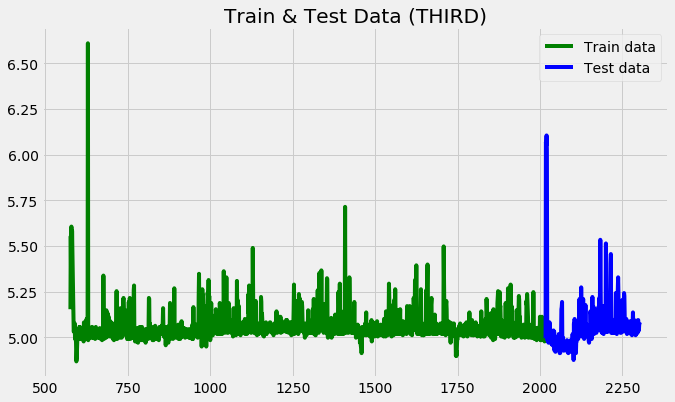

In [24]:
# Plot Train Test Data for - THIRD
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(train_data3, 'green', label='Train data')
plt.plot(test_data3, 'blue', label='Test data')
plt.title('Train & Test Data (THIRD)')
plt.legend()

In [25]:
# Fiting Holt Winter's multiplicative method with trend and seasonality - THIRD
y_hat_hwm3 = test_data3.copy()
model3 = ExponentialSmoothing(np.asarray(train_data3) ,seasonal_periods=144 ,trend='add', seasonal='mul')#'mul'
model_fit3 = model3.fit(optimized=True)
print(model_fit3.params)
y_hat_hwm3['hw_forecast'] = model_fit3.forecast(288)
res3 = model_fit3.resid
#print(model_fit9.summary())

C:\Users\Shraddhay\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


{'smoothing_level': 0.19960987000955469, 'smoothing_slope': 2.99568403916976e-11, 'smoothing_seasonal': 2.6252180231423173e-09, 'damping_slope': nan, 'initial_level': 5.28397217440844, 'initial_slope': 1.6443722616471086e-11, 'initial_seasons': array([1.00662193, 1.01966173, 1.00960763, 1.01942388, 1.00648777,
       1.01962001, 1.02012422, 1.01305194, 1.00981696, 1.00780799,
       1.00049501, 1.00536263, 1.00067859, 1.00849401, 1.00183426,
       1.00294605, 1.00246777, 1.00041668, 1.0055303 , 0.99593713,
       0.99790891, 1.00848358, 1.00560666, 1.00272229, 1.00439363,
       1.00714035, 1.00277966, 1.01394885, 1.00413177, 1.00603291,
       1.0131625 , 1.00572957, 1.00234362, 1.01711235, 1.00911712,
       1.01060771, 1.01141243, 1.01659809, 1.00645915, 1.01438162,
       1.00586724, 1.02582293, 1.01355961, 1.0047896 , 1.00095953,
       1.00364704, 1.00098654, 1.00836177, 1.00837894, 1.01867415,
       1.00222063, 1.00575066, 1.00160334, 1.0388559 , 1.00932377,
       1.01031073,

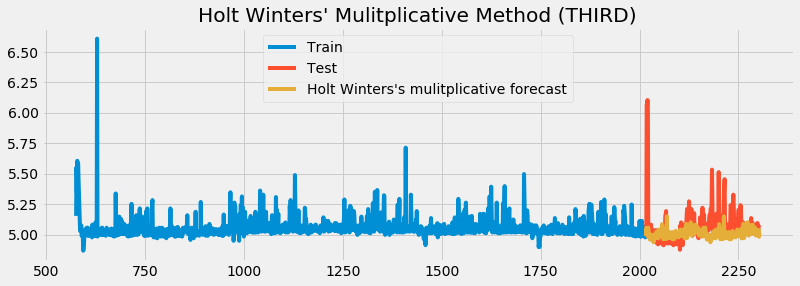

In [26]:
# Plot Holt Winter's multiplicative method with trend and seasonality - THIRD
plt.figure(figsize=(12,4))
plt.plot( train_data3, label='Train')
plt.plot(test_data3, label='Test')
plt.plot(y_hat_hwm3['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method (THIRD)')
plt.show()

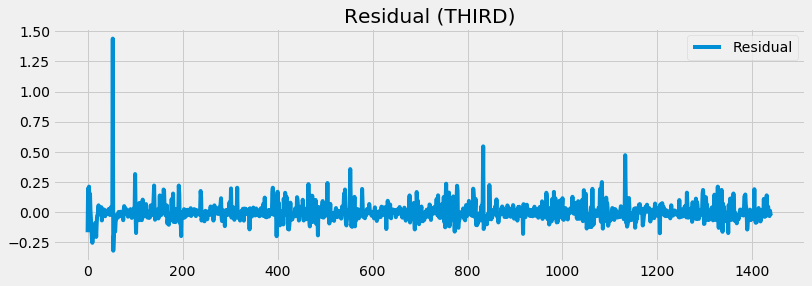

In [27]:
# Plot Residual - THIRD
plt.figure(figsize=(12,4))
plt.plot( res3, label='Residual')
plt.legend(loc='best')
plt.title('Residual (THIRD)')
plt.show()

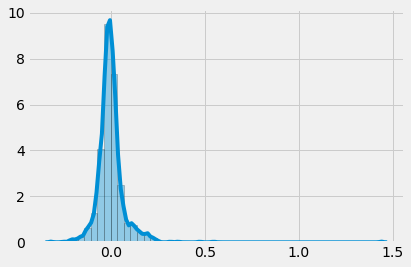

In [28]:
# Plot Residual Density Distribution - THIRD
sns.distplot(res3, hist=True, kde=True,            
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [29]:
# ljungbox test - THIRD
print(sm.stats.acorr_ljungbox(res3, lags=[1], return_df=True))

     lb_stat     lb_pvalue
1  24.259267  8.420097e-07


In [30]:
# Report performance after train, test & Predict - THIRD

mse = mean_squared_error(test_data3, y_hat_hwm3['hw_forecast'])
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data3, y_hat_hwm3['hw_forecast'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data3, y_hat_hwm3['hw_forecast']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs((test_data3['Request']- y_hat_hwm3['hw_forecast'])/test_data3['Request'])*100)
print('MAPE: '+str(mape))
mpe = np.mean((test_data3['Request']- y_hat_hwm3['hw_forecast']/np.abs(test_data3['Request'])*100))
print('MPE: '+str(mpe))
me = np.mean(test_data3['Request']- y_hat_hwm3['hw_forecast'])
print('ME: '+str(me))

MSE: 0.026176352090360875
MAE: 0.08471878925348292
RMSE: 0.16179107543483626
MAPE: 1.607485722236105
MPE: -93.85884596699604
ME: 0.05836791907519453


In [31]:
# Train test Split 2nd time from 9th Nov 2015 to 13th Nov 2015 as Train and 14th Nov 2015 as Test
train_data4 = df_log[864:2304] 
test_data4 = df_log[2304:2592] 
print(train_data3.tail())
print(test_data3.tail())

       Request
2011  5.030438
2012  4.990433
2013  5.056246
2014  4.976734
2015  4.990433
       Request
2299  5.062595
2300  5.036953
2301  5.068904
2302  5.075174
2303  5.081404


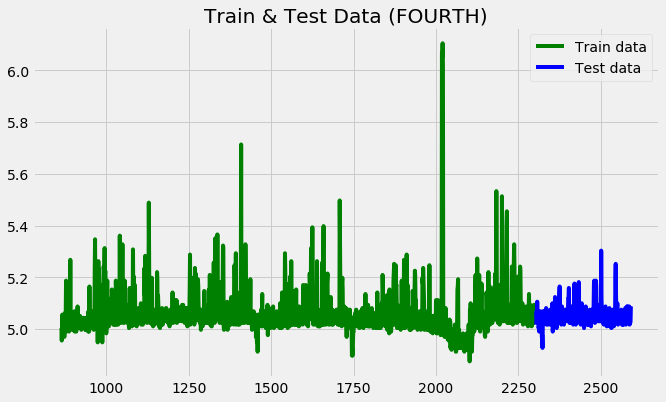

In [32]:
# Plot Train Test Data for - FOURTH
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(train_data4, 'green', label='Train data')
plt.plot(test_data4, 'blue', label='Test data')
plt.title('Train & Test Data (FOURTH)')
plt.legend()

In [33]:
# Fiting Holt Winter's multiplicative method with trend and seasonality - FOURTH
y_hat_hwm4 = test_data4.copy()
model4 = ExponentialSmoothing(np.asarray(train_data4) ,seasonal_periods=144 ,trend='add', seasonal='mul')#'mul'
model_fit4 = model4.fit(optimized=True)
print(model_fit4.params)
y_hat_hwm4['hw_forecast'] = model_fit4.forecast(288)
res4 = model_fit4.resid
#print(model_fit9.summary())

{'smoothing_level': 0.561888782651604, 'smoothing_slope': 9.510667783335044e-13, 'smoothing_seasonal': 3.459239511369907e-10, 'damping_slope': nan, 'initial_level': 5.015179885465922, 'initial_slope': 3.7948837919200926e-05, 'initial_seasons': array([0.99799285, 1.00220812, 1.01869605, 1.0234139 , 1.01711547,
       1.02260707, 1.00412124, 0.99912654, 0.99361957, 0.99737864,
       0.99247563, 0.99874629, 0.99287244, 1.00150655, 0.99504255,
       0.9947414 , 0.99255179, 0.99126363, 1.00032678, 0.98905258,
       0.99261992, 0.99873101, 0.9981428 , 0.99969139, 0.99977009,
       0.99695824, 0.99169161, 1.00341107, 0.99193937, 0.99246408,
       1.0019395 , 0.9930599 , 0.99037102, 1.00042482, 0.99890782,
       0.99869778, 0.99664126, 1.00465127, 0.99655329, 1.00293367,
       1.00348728, 1.01232974, 1.00177307, 0.99296232, 0.98854184,
       0.9913329 , 0.98847583, 0.9968212 , 0.99502602, 1.00506645,
       0.99752677, 0.99985827, 0.99261088, 0.9994926 , 1.0058822 ,
       1.00578156, 

C:\Users\Shraddhay\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


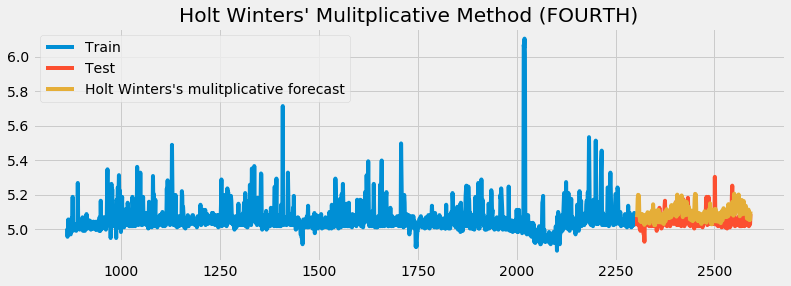

In [34]:
# Plot Holt Winter's multiplicative method with trend and seasonality - FOURTH
plt.figure(figsize=(12,4))
plt.plot( train_data4, label='Train')
plt.plot(test_data4, label='Test')
plt.plot(y_hat_hwm4['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method (FOURTH)')
plt.show()

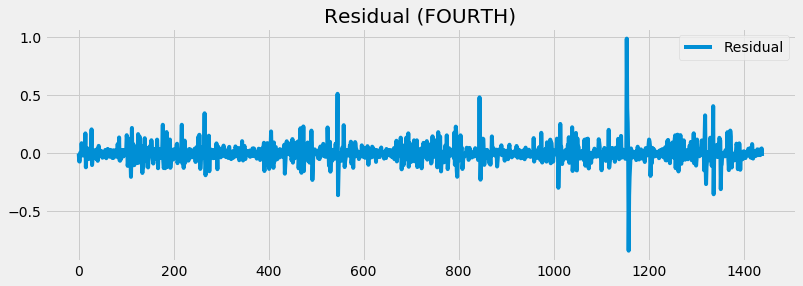

In [35]:
# Plot Residual - FOURTH
plt.figure(figsize=(12,4))
plt.plot( res4, label='Residual')
plt.legend(loc='best')
plt.title('Residual (FOURTH)')
plt.show()

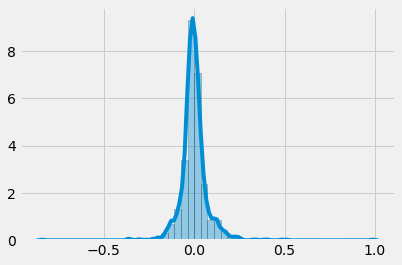

In [36]:
# Plot Residual Density Distribution - FOURTH
sns.distplot(res4, hist=True, kde=True,            
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [37]:
# ljungbox test - FOURTH
print(sm.stats.acorr_ljungbox(res4, lags=[1], return_df=True))

     lb_stat  lb_pvalue
1  11.751324   0.000608


In [38]:
# Report performance after train, test & Predict - FOURTH

mse = mean_squared_error(test_data4, y_hat_hwm4['hw_forecast'])
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data4, y_hat_hwm4['hw_forecast'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data4, y_hat_hwm4['hw_forecast']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs((test_data4['Request']- y_hat_hwm4['hw_forecast'])/test_data4['Request'])*100)
print('MAPE: '+str(mape))
mpe = np.mean((test_data4['Request']- y_hat_hwm4['hw_forecast']/np.abs(test_data4['Request'])*100))
print('MPE: '+str(mpe))
me = np.mean(test_data4['Request']- y_hat_hwm4['hw_forecast'])
print('ME: '+str(me))

MSE: 0.0039544881490212545
MAE: 0.051025922194634726
RMSE: 0.0628847211095132
MAPE: 1.0099683307921554
MPE: -95.72580701074136
ME: -0.03903178552122798


In [39]:
# Train test Split 2nd time from 10th Nov 2015 to 14th Nov 2015 as Train and 15th Nov 2015 as Test
train_data5 = df_log[1152:2592] 
test_data5 = df_log[2592:2880] 
print(train_data5.tail())
print(test_data5.tail())

       Request
2587  5.017280
2588  5.030438
2589  5.023881
2590  5.030438
2591  5.087596
       Request
2875  5.030438
2876  5.030438
2877  5.081404
2878  5.030438
2879  5.036953


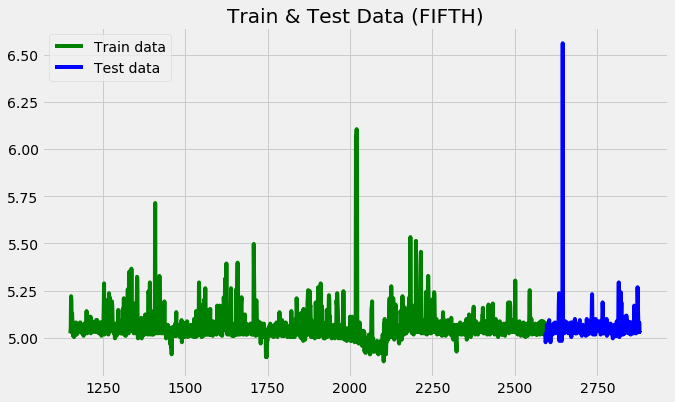

In [40]:
# Plot Train Test Data for - FIFTH
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(train_data5, 'green', label='Train data')
plt.plot(test_data5, 'blue', label='Test data')
plt.title('Train & Test Data (FIFTH)')
plt.legend()

In [41]:
# Fiting Holt Winter's multiplicative method with trend and seasonality - FIFTH
y_hat_hwm5 = test_data5.copy()
model5 = ExponentialSmoothing(np.asarray(train_data5) ,seasonal_periods=144 ,trend='add', seasonal='mul')#'mul'
model_fit5 = model5.fit(optimized=True)
print(model_fit5.params)
y_hat_hwm5['hw_forecast'] = model_fit5.forecast(288)
res5 = model_fit5.resid
#print(model_fit9.summary())

C:\Users\Shraddhay\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


{'smoothing_level': 0.6181810530685018, 'smoothing_slope': 3.660352784512169e-12, 'smoothing_seasonal': 5.6622940766299575e-11, 'damping_slope': nan, 'initial_level': 5.035263397866116, 'initial_slope': 2.375393699295548e-06, 'initial_seasons': array([1.00078513, 1.00520479, 1.02205136, 1.02678953, 1.01988446,
       1.02342727, 1.00717799, 1.00049871, 0.99581384, 0.99774092,
       0.99197131, 0.99868015, 0.99475443, 1.00375591, 0.99419621,
       0.99696364, 0.99479658, 0.99300517, 1.00152217, 0.99006435,
       0.99677358, 1.00036387, 0.99951395, 1.00564995, 1.0034132 ,
       1.00087034, 0.99690098, 1.00177231, 0.99800297, 0.99928032,
       1.00824379, 1.00213936, 0.99921706, 1.00182004, 1.00218024,
       1.00438008, 1.00334903, 1.00971153, 1.0053275 , 1.00849801,
       1.00856294, 1.0123113 , 1.0076721 , 0.99832043, 0.99448527,
       0.99789583, 0.99486317, 1.00118291, 0.99724015, 1.01036298,
       1.00222686, 1.00341498, 0.99775793, 1.01007679, 1.01171204,
       1.0107132 ,

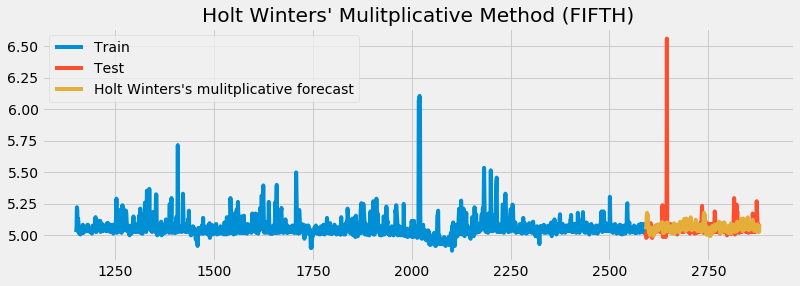

In [42]:
# Plot Holt Winter's multiplicative method with trend and seasonality - FIFTH
plt.figure(figsize=(12,4))
plt.plot( train_data5, label='Train')
plt.plot(test_data5, label='Test')
plt.plot(y_hat_hwm5['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method (FIFTH)')
plt.show()

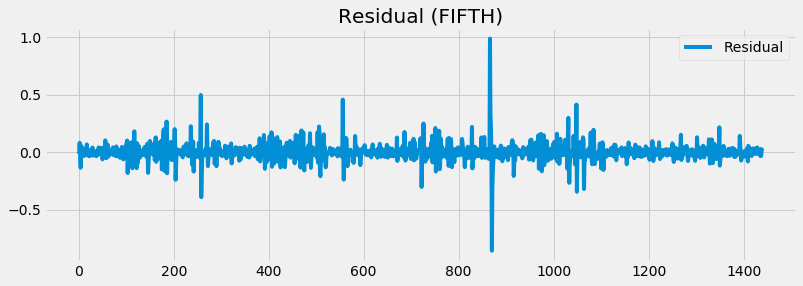

In [43]:
# Plot Residual - FIFTH
plt.figure(figsize=(12,4))
plt.plot( res5, label='Residual')
plt.legend(loc='best')
plt.title('Residual (FIFTH)')
plt.show()

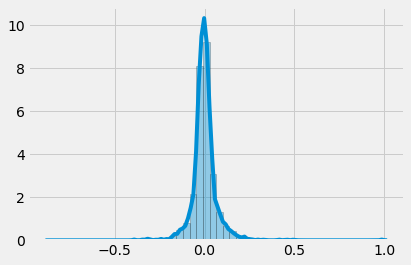

In [44]:
# Plot Residual Density Distribution - FIFTH
sns.distplot(res5, hist=True, kde=True,            
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [45]:
# ljungbox test - FIFTH
print(sm.stats.acorr_ljungbox(res5, lags=[1], return_df=True))

    lb_stat  lb_pvalue
1  8.645134   0.003279


In [46]:
# Report performance after train, test & Predict - FIFTH

mse = mean_squared_error(test_data5, y_hat_hwm5['hw_forecast'])
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data5, y_hat_hwm5['hw_forecast'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data5, y_hat_hwm5['hw_forecast']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs((test_data5['Request']- y_hat_hwm5['hw_forecast'])/test_data5['Request'])*100)
print('MAPE: '+str(mape))
mpe = np.mean((test_data5['Request']- y_hat_hwm5['hw_forecast']/np.abs(test_data5['Request'])*100))
print('MPE: '+str(mpe))
me = np.mean(test_data5['Request']- y_hat_hwm5['hw_forecast'])
print('ME: '+str(me))

MSE: 0.010077083961757173
MAE: 0.039848283326917575
RMSE: 0.10038467991559855
MAPE: 0.7631271880750907
MPE: -95.04160032943483
ME: -0.003363912441197717


In [47]:
# Creating Final Predict Series from 11th Nov 2015 to 15th Nov 2015
Final_Pred_log = pd.concat([y_hat_hwm1, y_hat_hwm2, y_hat_hwm3, y_hat_hwm4, y_hat_hwm5]) 
print(Final_Pred_log.head())
print(Final_Pred_log.tail())

       Request  hw_forecast
1440  5.030438     5.022614
1441  5.023881     5.093358
1442  4.997212     5.093610
1443  5.056246     5.164247
1444  5.003946     5.034213
       Request  hw_forecast
2875  5.030438     5.046960
2876  5.030438     5.023776
2877  5.081404     5.058314
2878  5.030438     5.027930
2879  5.036953     5.084406


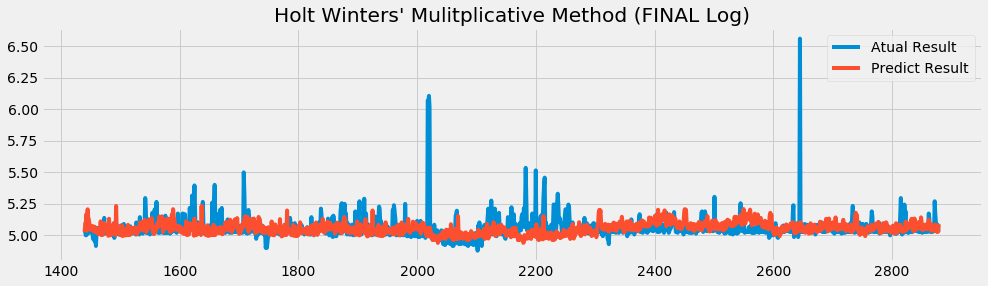

In [48]:
# Plot Final Log Series with Predit & Atual data from 11th Nov 2015 to 15th Nov 2015

plt.figure(figsize=(15,4))
plt.plot( Final_Pred_log['Request'], label='Atual Result')
plt.plot(Final_Pred_log['hw_forecast'], label='Predict Result')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method (FINAL Log)')
plt.show()

In [49]:
# Final performance report with Predit & Atual data from 11th Nov 2015 to 15th Nov 2015

mse = mean_squared_error(Final_Pred_log['Request'], Final_Pred_log['hw_forecast'])
print('MSE: '+str(mse))
mae = mean_absolute_error(Final_Pred_log['Request'], Final_Pred_log['hw_forecast'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(Final_Pred_log['Request'], Final_Pred_log['hw_forecast']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs((Final_Pred_log['Request']- Final_Pred_log['hw_forecast'])/Final_Pred_log['Request'])*100)
print('MAPE: '+str(mape))
mpe = np.mean((Final_Pred_log['Request']- Final_Pred_log['hw_forecast']/np.abs(Final_Pred_log['Request'])*100))
print('MPE: '+str(mpe))
me = np.mean(Final_Pred_log['Request']- Final_Pred_log['hw_forecast'])
print('ME: '+str(me))

MSE: 0.010203302021886067
MAE: 0.05548746731999318
RMSE: 0.10101139550509174
MAPE: 1.0755984262065548
MPE: -94.88231637598375
ME: 0.004578379812336102


In [50]:
# Creating final pridict data set and recover the original series
Final_Pred = np.round((np.exp(Final_Pred_log)),0)
Final_Pred = Final_Pred.astype(np.int64)
Final_Pred.head()

,Request,hw_forecast
1440,153,152
1441,152,163
1442,148,163
1443,157,175
1444,149,154


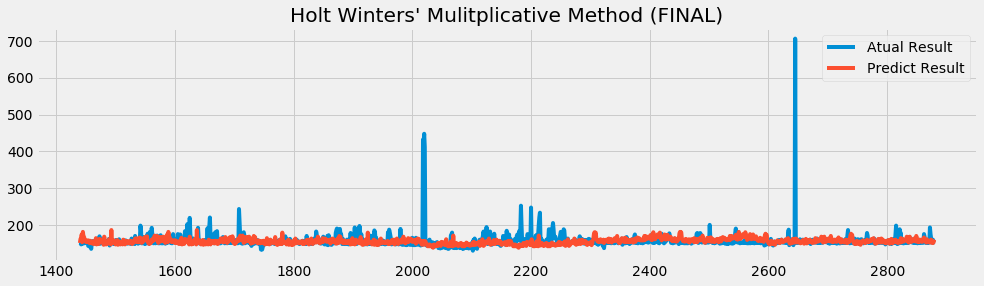

In [51]:
# Plot Final Series with Predit & Atual data from 11th Nov 2015 to 15th Nov 2015

plt.figure(figsize=(15,4))
plt.plot( Final_Pred['Request'], label='Atual Result')
plt.plot(Final_Pred['hw_forecast'], label='Predict Result')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method (FINAL)')
plt.show()

In [52]:
# Adding the Time column for better understanding
Final_Pred['Time']=Time.iloc[1440:]
Final_Pred.tail()

,Request,hw_forecast,Time
2875,153,156,2015-11-15 23:35:00
2876,153,152,2015-11-15 23:40:00
2877,161,157,2015-11-15 23:45:00
2878,153,153,2015-11-15 23:50:00
2879,154,161,2015-11-15 23:55:00


In [53]:
# Export data in 'pridict_data_CPU_New.csv' 
Final_Pred.to_csv(r'C:\Users\Shraddhay\Downloads\New Project\pridict_data_CPU_New.csv', index = False)